<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analisecovidbsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


#Análise dos dados - COVID - Brasília
**ÚLTIMA ATUALIZAÇÃO 13/07/2020**

O Distrito Federal foi um dos entes da federação que começaram cedo com as medidas de isolamento social. 

Passados 3 meses desde o primeiro caso de covid na capital, na primeira semana de março, Brasília tem forte queda nas taxas de isolamento social.

O governo julga seguro a retomada das atividades e está gradativamente liberando a reabertura, com algumas restrições, do comércio essencial, dos parques, dos clubes e das igrejas, deixando por último a reabertura de bares, restaurantes e academias, consideradas atividades não essenciais.

Diante do cenário, analisaremos os dados sobre o **corona vírus** e veremos quais informações podemos extrair dos dados brutos disponibilizados pelo governo do Distrito Federal.

O estudo será atualizado semanalmente.


##Obtenção de dados
Os utilizados na presente análise foram extraídos do [site do GDF](https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/) destinado às informações referentes ao **COVID**.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt

%matplotlib inline

In [27]:
df = pd.read_excel('/content/dados-abertos.xlsx')

## Dicionário de variáveis
* id - número gerado para identificar o paciente
* Sexo - gênero do paciente
* Faixa etária - faixa de idade do paciente
* Estado de saúde - estado que se encontra o paciente identificado
* Comorbidades - identifica se o paciente possui comorbidades
* RA - Região Administrativa
* Data - data de importação dos dados
* Data Cadastro - data do cadastramento ou atualização dos dados do paciente

Dentre as comorbidades, são identificadas em variáveis separadas: Pneumopatia, Nefropatia, Doença Hematológica, Distúrbios metabólicos, Imunopressão, Obesidade, Cardiovasculopatia e Outros.

### A seguir, observemos um pedaço-resumo do dataframe, analisando as 5 primeiras entradas:

In [28]:
df.head(5)

,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Comorbidades,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunossupressão,Obesidade,Outros,Cardiovasculopatia
0,2020-07-13,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-13,2020-03-18,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-29,Sim,Sim,Não,Não,Sim,Não,Não,Não,Não
2,2020-07-13,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-13,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,2020-03-14,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim
4,2020-07-13,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visão geral dos dados

Os dados possuem 70.977 entradas e 17 variáveis.
Quando observamos os dados da tabela verificamos que existem campos para diferentes comorbidades. 

Para facilitar a análise, criamos uma entrada denominada "Comorbidades" que aponta se há ou não qualquer tipo de comorbidade apresentada pelo paciente, ou se o valor não foi informado.

Todas as variáveis, com exceção das datas, são do tipo "object", ou seja, do tipo string.



In [29]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 70977
Variáveis:	 17



Data                      datetime64[ns]
Data Cadastro             datetime64[ns]
Sexo                              object
Faixa Etária                      object
RA                                object
UF                                object
Óbito                             object
dataPrimeirosintomas      datetime64[ns]
Comorbidades                      object
Pneumopatia                       object
Nefropatia                        object
Doença Hematológica               object
Distúrbios Metabólicos            object
Imunossupressão                   object
Obesidade                         object
Outros                            object
Cardiovasculopatia                object
dtype: object

## Nulls
A maior parte dos valores em branco se relacionam com as informações sobre Comorbidades do paciente. Observa-se que quando há uma comorbidade, as outras comorbidades listadas são, geralmente, preenchidas com "sim" ou "não", e na maioria dos casos(88%), não é informado se há ou não comorbidades.

Uma hipótese é a de que quando registrada uma comorbidade, se avaliam as outras e se não há comorbidade, os valores ficam em branco.

Em relação as informações sobre o estado de saúde do paciente, apesar de não conter valores nulos, a maior parte do valor é dado como "não informado".

In [30]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Doença Hematológica       0.995252
Nefropatia                0.991786
Imunossupressão           0.989518
Obesidade                 0.988870
Pneumopatia               0.978768
Distúrbios Metabólicos    0.962382
Cardiovasculopatia        0.944419
Outros                    0.888837
Comorbidades              0.888837
UF                        0.015301
Data Cadastro             0.000704
dataPrimeirosintomas      0.000000
Óbito                     0.000000
RA                        0.000000
Faixa Etária              0.000000
Sexo                      0.000000
Data                      0.000000
dtype: float64

## Análise exploratória dos dados

### Regiões do DF
Ceilândia é a cidade com mais casos de corona vírus, representando aproximadamente 13% dos pacientes diagnosticados. A Região administrativa é seguida em maiores números de casos pelo Plano Piloto,Taguatinga e Samambaia, com aproximadamente 7% dos casos cada.

As regiões do Pôr do Sol, Candangolândia, Sobradinho II,  Arniqueira, Varjão, SIA e Fercal representam os locais com menos casos. 

Observa-se que dado ao fato das regiões estarem predominantemente classificadas como regiões de baixa renda, segundo dados da Codeplan 2018, pode haver subnotificação de casos.

Segundos os dados da Codeplan(2018), as regiões de classificam da seguinte maneira:

• **Grupo 1 (alta renda)**: Plano Piloto, Jardim Botânico, Lago Norte, Lago Sul, Park Way e Sudoeste/Octogonal, com renda domiciliar de R$ 15.622

• **Grupo 2 (média-alta renda)**: Águas Claras, Candangolândia, Cruzeiro, Gama, Guará, Núcleo
Bandeirante, Sobradinho, Sobradinho II, Taguatinga e Vicente Pires, com renda domiciliar média de R$ 7.266;

• **Grupo 3 (média-baixa renda)**: Brazlândia, Ceilândia, Planaltina, Riacho Fundo, Riacho Fundo
II, SIA, Samambaia, Santa Maria e São Sebastião, com renda domiciliar média de R$ 3.101;

• **Grupo 4 (baixa renda)**: Fercal, Itapoã, Paranoá, Recanto das Emas, SCIA–Estrutural e Varjão, com renda domiciliar média de R$
2.472;



In [31]:
df.RA.value_counts() / df.shape[0]


Ceilândia                0.126182
Plano Piloto             0.073686
Taguatinga               0.069262
Samambaia                0.068600
Outros Estados           0.054285
Não Informado            0.047861
Gama                     0.047100
Entorno DF               0.039717
Sobradinho               0.037252
Guará                    0.036871
Águas Claras             0.036406
Paranoá                  0.034560
São Sebastião            0.032377
Santa Maria              0.031926
Planaltina               0.031250
Recanto das Emas         0.029982
Sistema Penitenciário    0.021472
Riacho Fundo             0.018090
Itapoã                   0.017301
Sudoeste/Octogonal       0.013610
Riacho Fundo II          0.013413
Brazlândia               0.013103
Vicente Pires            0.013061
Jardim Botânico          0.012892
Lago Sul                 0.012525
SCIA                     0.009876
Núcleo Bandeirante       0.008397
Sobradinho II            0.008355
Lago Norte               0.008031
Cruzeiro      

###Gênero
Em relação ao gênero dos paciêntes com Covid, observa-se que não há diferença de gênero em relação a quantidade de infectados, sendo aproximadamente 52% dos infectadosdo sexo feminino e 48% do sexo masculino, conforme o Gráfico 1.

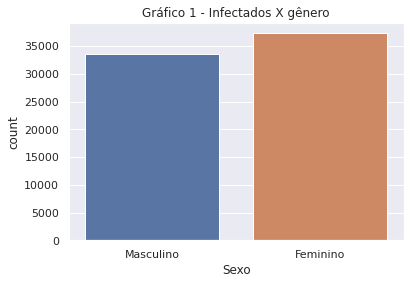

Feminino     0.525917
Masculino    0.474083
Name: Sexo, dtype: float64

In [32]:
sns.set()
sns.countplot(df['Sexo'])
plt.title('Gráfico 1 - Infectados X gênero')
plt.show()
df.Sexo.value_counts() / df.shape[0]

##Faixa Etária
A análise da faixa etária nos demonstra que há menor número de casos notificados entre os menores de 19 anos e maiores de 60 anos. Portanto, o maior número de infecções fica por dentro dessa faixa etária, conforme observado no Gráfico 2.


30 a 39 anos    0.270919
40 a 49 anos    0.224904
20 a 29 anos    0.190738
50 a 59 anos    0.136227
>= 60 anos      0.107486
<= 19 anos      0.069727
Name: Faixa Etária, dtype: float64

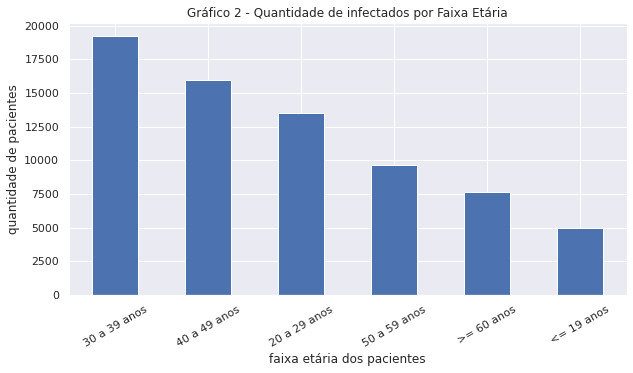

In [33]:

sns.set()
plt.figure(figsize=(10,5))
df['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 2 - Quantidade de infectados por Faixa Etária')
plt.xticks(rotation=30)
df['Faixa Etária'].value_counts() / df.shape[0]


##Estado de saúde
No decorrer da análise, a estrutura disponibilizada pelo governo do GDF foi alterada. 
Havia uma variável chamada "Estado de Saúde", que mostrava se havia óbito ou se o paciente estava recuperado. Dessa variável, 20% dos valores não eram informados e 1% eram óbitos.

O novo dataframe veio com uma coluna chamada "Óbito", não havendo mais a separação por estado de saúde (recuperado ou óbito)

Além disso, houve a inclusão da variável "Dia dos primeiros sintomas".


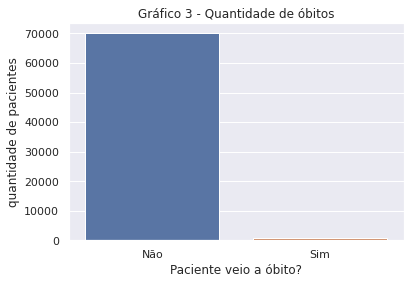

In [34]:
sns.set()
sns.countplot(df['Óbito'])
plt.xlabel('Paciente veio a óbito?')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 3 - Quantidade de óbitos')
plt.xticks(rotation=0)
plt.show()

In [61]:
df['Óbito'].value_counts() / df['Óbito'].shape[0]

Não    0.987094
Sim    0.012906
Name: Óbito, dtype: float64

##Óbitos
Observa-se que o número de óbitos é maior no sexo masculino, representando 540 óbitos de homens (58%), em 29 de junho, apesar das mulheres serem 52% dos pacientes infectados.

No gráfico de faixa etária do sexo masculino, há um menor número de homens com idade entre >= 60 anos quando comparado ao número de mulheres, aproximadamente 68% do total. As mulheres nessa faixa etária representam 79% total, conforme evidenciado nos Gráficos 4 e 5.

Dessa forma, os homens mesmo sendo mais jovens, vêm mais à óbito, representando 58% do total de óbitos. Essa situação merece uma maior investigação.

Observa-se também que apesar dos idosos (pacientes > 60 anos) serem apenas 10% dos pacientes totais, estes representam aproximadamente 73% dos óbitos, mostrando que há um **alto risco de mortalidade** nessa faixa etária, conforme evidenciado no Gráfico 6.

In [35]:
df1 = df[df["Óbito"] == "Sim"]

In [36]:
df1.Sexo.value_counts()

Masculino    540
Feminino     376
Name: Sexo, dtype: int64

In [37]:
df1.Sexo.value_counts() / df1.Sexo.shape[0]

Masculino    0.58952
Feminino     0.41048
Name: Sexo, dtype: float64

In [38]:
df9 = df1[df1["Sexo"] == "Feminino"]

In [39]:
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.795213
50 a 59 anos    0.093085
40 a 49 anos    0.071809
30 a 39 anos    0.031915
20 a 29 anos    0.005319
<= 19 anos      0.002660
Name: Faixa Etária, dtype: float64

In [40]:
df10 = df1[df1["Sexo"] == "Masculino"]
df10['Faixa Etária'].value_counts() / df10['Faixa Etária'].shape[0]

>= 60 anos      0.688889
50 a 59 anos    0.153704
40 a 49 anos    0.103704
30 a 39 anos    0.044444
20 a 29 anos    0.007407
<= 19 anos      0.001852
Name: Faixa Etária, dtype: float64

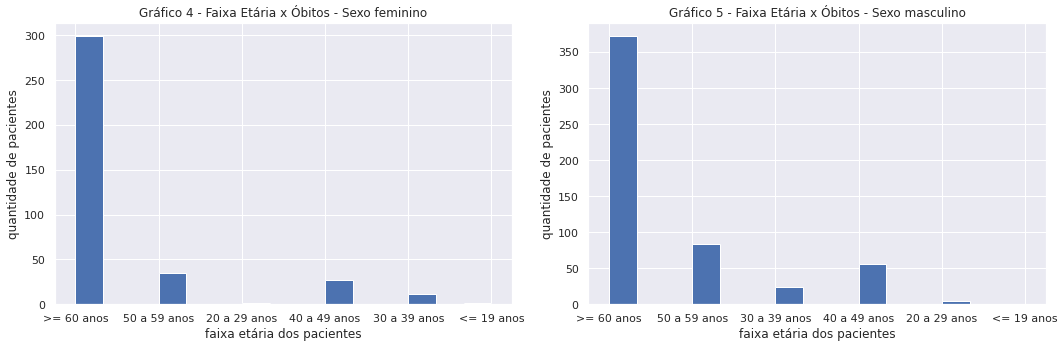

In [20]:
x = df9['Faixa Etária']
y = df10['Faixa Etária']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
sns.set()
ax1.hist(x, bins = 15)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title('Gráfico 4 - Faixa Etária x Óbitos - Sexo feminino')
ax1.set_xlabel("faixa etária dos pacientes")
ax1.set_ylabel("quantidade de pacientes")

ax2.hist(y, bins = 15)
ax2.tick_params(axis='y', labelrotation=0)
ax2.set_title('Gráfico 5 - Faixa Etária x Óbitos - Sexo masculino')
ax2.set_xlabel("faixa etária dos pacientes")
ax2.set_ylabel("quantidade de pacientes")

fig.tight_layout();


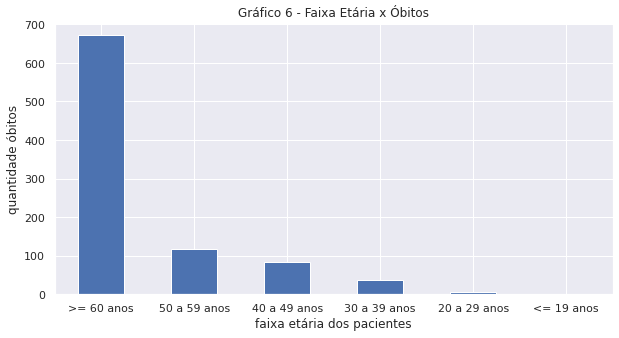

In [21]:
sns.set()
plt.figure(figsize=(10,5))
df1['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 6 - Faixa Etária x Óbitos');
plt.xticks(rotation=0)
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]
plt.show()

In [41]:
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]

>= 60 anos      0.732533
50 a 59 anos    0.128821
40 a 49 anos    0.090611
30 a 39 anos    0.039301
20 a 29 anos    0.006550
<= 19 anos      0.002183
Name: Faixa Etária, dtype: float64

##Comorbidades X Óbitos
Em relação aos óbitos, o Gráfico 7 demonstra que aproximadamente 89% dos pacientes que vieram a falecer possuiam algum tipo de comorbidade.

A análise ainda mostra que a maioria sofria das comorbidades do tipo "Distúrbios Metabólicos" e "Cardiovasculopatia",  conforme observado no Gráfico 8.

Cumpre destacar que esses pacientes podiam possuir 1 ou mais tipos de comorbidades.

In [42]:
df2 = df1[df1["Comorbidades"] == "Sim"]

In [43]:
df12 = df1
df12['Comorbidades'].fillna("Não Informado", inplace=True);

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
df12['Comorbidades'].value_counts()


Sim              814
Não Informado    102
Name: Comorbidades, dtype: int64

In [64]:
df12['Comorbidades'].value_counts() / df12['Comorbidades'].shape[0]

Sim              0.888646
Não Informado    0.111354
Name: Comorbidades, dtype: float64

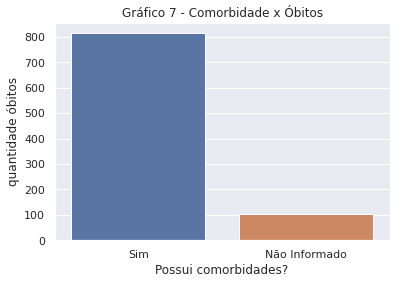

Sim              0.888646
Não Informado    0.111354
Name: Comorbidades, dtype: float64

In [46]:
sns.set()
sns.countplot(df12['Comorbidades'])
plt.xlabel('Possui comorbidades?')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 7 - Comorbidade x Óbitos')
plt.show();
df12.Comorbidades.value_counts()/df12.Comorbidades.shape[0]


In [47]:
df3 = df2.iloc[:,8:]

In [48]:
df4 = df3.fillna('Não')

In [49]:
df5 = df4.replace(["Sim"], 1)

In [50]:
df6 = df5.replace(["Não"],0 )

In [51]:
df7= df6.drop(columns="Comorbidades")

In [52]:
df7.sum()

Pneumopatia               135
Nefropatia                 73
Doença Hematológica         9
Distúrbios Metabólicos    348
Imunossupressão            93
Obesidade                 108
Outros                    134
Cardiovasculopatia        572
dtype: int64

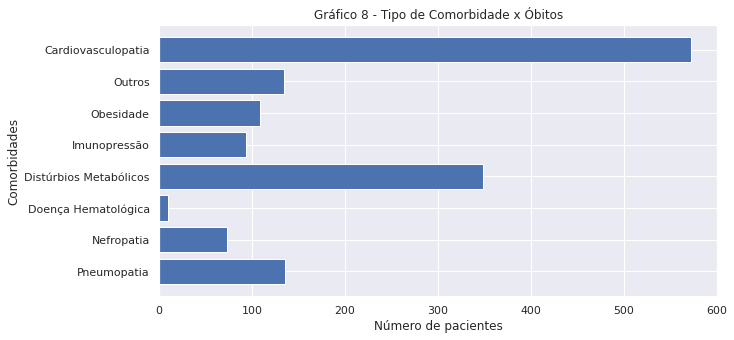

In [54]:
disease = ['Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
n_disease = [135,73,9,348,93,108,134,572]

sns.set()
plt.figure(figsize=(10,5))
plt.barh(disease, n_disease);
plt.xlabel('Número de pacientes')
plt.ylabel('Comorbidades')
plt.title('Gráfico 8 - Tipo de Comorbidade x Óbitos');

##Análise temporal

Em relação a quantidade de infectados, a análise dos dados sugere ainda uma tendência de crescimento, concomitante com o crescimento de óbitos, conforme evidenciado nos Gráficos 9 e 10.



In [55]:
df8 = df

In [56]:
df8['Pacientes'] = 1

In [57]:
df8['Mês'] = df8['Data'].dt.month

In [58]:
df8.index = df8['Data Cadastro']

2020-07-06    2869
2020-06-29    2839
2020-06-28    2541
2020-07-05    2355
2020-07-12    2291
              ... 
2020-04-05      10
2020-04-08       8
2020-03-17       1
2020-03-16       1
2020-03-01       1
Name: Data Cadastro, Length: 121, dtype: int64

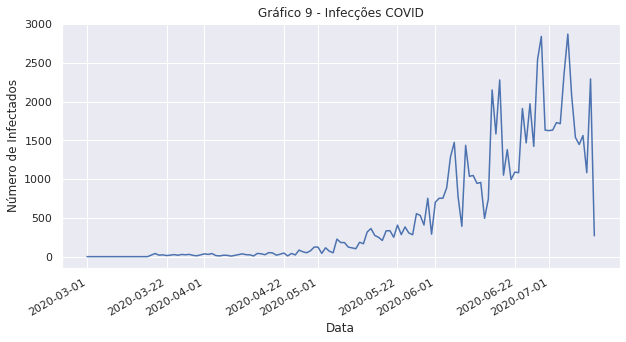

In [59]:
sns.set()
plt.figure(figsize=(10,5))
df8['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de Infectados")
plt.title('Gráfico 9 - Infecções COVID')
df8['Data Cadastro'].value_counts() 

2020-07-07    45
2020-07-01    29
2020-06-23    26
2020-06-30    26
2020-06-22    25
              ..
2020-05-01     1
2020-04-12     1
2020-03-28     1
2020-04-23     1
2020-04-13     1
Name: Data Cadastro, Length: 93, dtype: int64

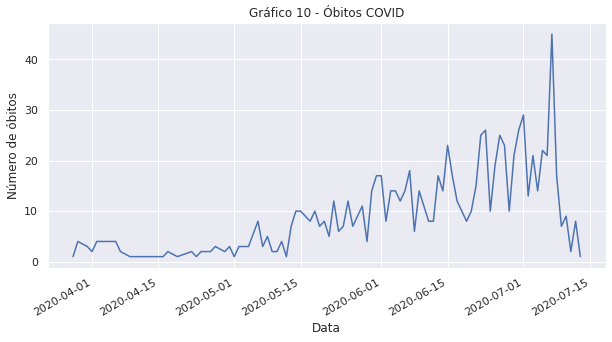

In [60]:
sns.set()
plt.figure(figsize=(10,5))
df1['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.title('Gráfico 10 - Óbitos COVID')
df1['Data Cadastro'].value_counts() 



##Conclusões
No recente cenário de pandemia mundial, Brasília também se encontra em número crescente de infectados e óbitos.

Nesse estudo, observamos que o número de óbitos é maior entre os que possuem comorbidades (88%) e apesar do fato de a faixa Etária dos infectados com idade acima de 60 anos representar 10% dos infectados totais, eles representam 73% dos óbitos.

Também observou-se que apesar dos números de infectados serem semelhantes entre homens e mulheres, os homens vão mais a óbito, representando 58% dos falecimentos.

Dentre as comorbidades que estão mais relacionadas com os óbitos estão a Cardiovasculopatia e os Distúrbios Metabólicos.

Cumpre salientar que no antigo dataframe disponibilizado pelo GDF havia a variável "Estados de saúde"  com 20% dos valores não informados. No dataframe atual, foi incluído a variável 'óbito' e 'dia dos primeiros sintomas'.

Este estudo demonstra algumas análises que se pode extrair dos dados brutos abertos disponibilizados pelo Governo do Distrito Federal.

Esse estudo será atualizado semanalmente.

Carmen Scartezini, Accountant & Data Science Student.